In [90]:
import pandas as pd
import numpy as np
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn

In [91]:
print(pd)
print("pandas v"+pd.__version__)
print("matplotlib v"+matplotlib.__version__)
print("seaborn v"+seaborn.__version__)

<module 'pandas' from 'C:\\Users\\Napat-PC\\anaconda3\\envs\\tensorflow_nightly\\lib\\site-packages\\pandas\\__init__.py'>
pandas v1.1.2
matplotlib v3.3.2
seaborn v0.11.0


## Environment variables

In [2]:
## Define local database connection
MYSQL_HOST = 'localhost'
MYSQL_USER = 'root'
MYSQL_PASSWORD = 'password'
MYSQL_DB = 'f1_db'

# 1) Prepare data

In [3]:
def get_df(sql_statement):
    cnx = pymysql.connect(host=MYSQL_HOST, user=MYSQL_USER, password=MYSQL_PASSWORD, db=MYSQL_DB)
    df = pd.read_sql(sql_statement, con=cnx)
    cnx.close()
    return df

In [4]:
circuit_df = get_df(f"""
            SELECT * FROM f1_db.circuits;
            """)
circuit_df = circuit_df.drop(columns=["url"])

In [5]:
print(f"len = {len(circuit_df)}")
circuit_df.head()

len = 76


,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,NaN
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN


In [6]:
constructor_result_df = get_df(f"""
            SELECT * FROM f1_db.constructorresults;
            """)

In [7]:
print(f"len = {len(constructor_result_df)}")
constructor_result_df.head()

len = 11680


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,None
1,2,18,2,8.0,None
2,3,18,3,9.0,None
3,4,18,4,5.0,None
4,5,18,5,2.0,None


In [8]:
constructor_df = get_df(f"""
            SELECT * FROM f1_db.constructors;
            """)
constructor_df = constructor_df.drop(columns=["url"])

In [9]:
print(f"len = {len(constructor_df)}")
constructor_df.head()

len = 211


,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [10]:
constructor_standing_df = get_df(f"""
            SELECT * FROM f1_db.constructorstandings;
            """)

In [11]:
print(f"len = {len(constructor_standing_df)}")
constructor_standing_df.head()

len = 12436


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [12]:
driver_df = get_df(f"""
            SELECT * FROM f1_db.drivers;
            """)
driver_df = driver_df.drop(columns=["url"])

In [13]:
print(f"len = {len(driver_df)}")
driver_df.head()

len = 848


,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [14]:
driver_standing_df = get_df(f"""
            SELECT * FROM f1_db.driverstandings;
            """)

In [15]:
print(f"len = {len(driver_standing_df)}")
driver_standing_df.head()

len = 32815


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [16]:
laptime_df = get_df(f"""
            SELECT * FROM f1_db.laptimes;
            """)

In [17]:
print(f"len = {len(laptime_df)}")
laptime_df.head()

len = 485110


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [18]:
pitstop_df = get_df(f"""
            SELECT * FROM f1_db.pitstops;
            """)

In [19]:
print(f"len = {len(pitstop_df)}")
pitstop_df.head()

len = 7843


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,0 days 17:05:23,26.898,26898
1,841,30,1,1,0 days 17:05:52,25.021,25021
2,841,17,1,11,0 days 17:20:48,23.426,23426
3,841,4,1,12,0 days 17:22:34,23.251,23251
4,841,13,1,13,0 days 17:24:10,23.842,23842


In [20]:
qualifying_df = get_df(f"""
            SELECT * FROM f1_db.qualifying;
            """)

In [21]:
print(f"len = {len(qualifying_df)}")
qualifying_df.head()

len = 8594


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [22]:
race_df = get_df(f"""
            SELECT * FROM f1_db.races;
            """)

In [23]:
print(f"len = {len(race_df)}")
race_df.head()

len = 1035


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,0 days 06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,0 days 09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,0 days 07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,0 days 12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,0 days 12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [24]:
result_df = get_df(f"""
            SELECT t1.*,t2.status FROM f1_db.results as t1 join f1_db.status as t2 on t1.statusId = t2.statusId;
            """)

In [25]:
print(f"len = {len(result_df)}")
result_df.head()

len = 24860


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,Finished
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1,Finished
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1,Finished
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1,Finished
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1,Finished


In [26]:
status_df = get_df(f"""
            SELECT * FROM f1_db.status;
            """)

In [27]:
print(f"len = {len(status_df)}")
status_df.head()

len = 136


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


# 2) EDA

### Circuit analysis

#### no of events by country

In [28]:
get_df(f"""
SELECT country, count(*) as no_of_events  FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId group by country order by no_of_events desc;
""").head(5)

,country,no_of_events
0,Italy,100
1,Germany,79
2,UK,75
3,USA,70
4,Monaco,66


#### no of events by location

In [29]:
get_df(f"""
SELECT country, location, count(*) as no_of_events  FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId group by country,location order by no_of_events desc;
""").head(5)

,country,location,no_of_events
0,Italy,Monza,70
1,Monaco,Monte-Carlo,66
2,UK,Silverstone,55
3,Belgium,Spa,53
4,Germany,Nürburg,41


### no of events by location in past centuries

In [30]:
def group_year(y):
    for a,b in [(a-19,a) for a in list(range(2020,1960,-20))]+[(1950,1960)]:
        if y >= a and y <= b:
            return f"{a}-{b}" 
    return "unclassfied"

In [31]:
df = get_df(f"""
SELECT year,location,country FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId
""")
df["year"] = df["year"].apply(lambda a: group_year(a))
df = df.reset_index()
df = df.groupby(['location','country','year']).count()
df = df.sort_values(["year","index"],ascending=False)
df = df.reset_index()
df = df[df["year"] != "unclassfied"]
df = df.sort_values('index',ascending = False).groupby('year').head(5)
df = df.sort_values(["year","index","country"],ascending=False)
df["location"] = df["location"] + ", " + df["country"]
df = df.rename(columns={"index":"no_of_events"})
df.head()

,location,country,year,no_of_events
0,"Silverstone, UK",UK,2001-2020,21
2,"Montmeló, Spain",Spain,2001-2020,20
3,"Monza, Italy",Italy,2001-2020,20
1,"Budapest, Hungary",Hungary,2001-2020,20
6,"São Paulo, Brazil",Brazil,2001-2020,19


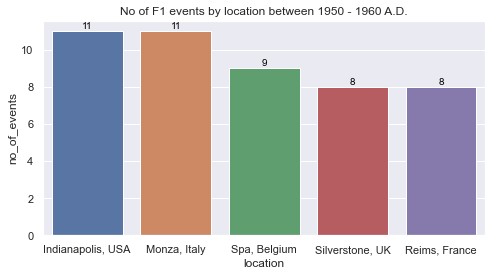

In [32]:
df_2 = df[df["year"]=="1950-1960"].copy()
df_2 = df_2.reset_index(drop=True)
sns.set(rc={'figure.figsize':(7,4)})
g=sns.barplot(x='location',y='no_of_events',data=df_2)
g.set_title("No of F1 events by location between 1950 - 1960 A.D.")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_2['no_of_events'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

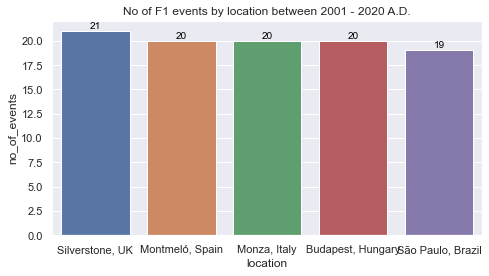

In [33]:
df_3 = df[df["year"]=="2001-2020"].copy()
df_3 = df_3.reset_index(drop=True)
sns.set(rc={'figure.figsize':(7,4)})
g=sns.barplot(x='location',y='no_of_events',data=df_3)
g.set_title("No of F1 events by location between 2001 - 2020 A.D.")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_3['no_of_events'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

#### no of events by country for each year

In [34]:
df_4 = get_df(f"""
SELECT year,country FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId
""")
df_4["year"] = df_4["year"].apply(lambda a: group_year(a))
df_4 = df_4.reset_index()
df_4 = df_4.groupby(['country','year']).count()
df_4 = df_4.sort_values(["year","index"],ascending=False)
df_4 = df_4.reset_index()
df_4 = df_4[df_4["year"] != "unclassfied"]
# df = df.sort_values('index',ascending = False).groupby('year').head(5)
df_4 = df_4.rename(columns={"index":"no_of_events"})
df_4 = df_4.sort_values(["year","no_of_events"],ascending=[True,False])
df_4 = df_4[df_4["country"].isin(["Italy","Germany","USA","UK","Monaco"])]

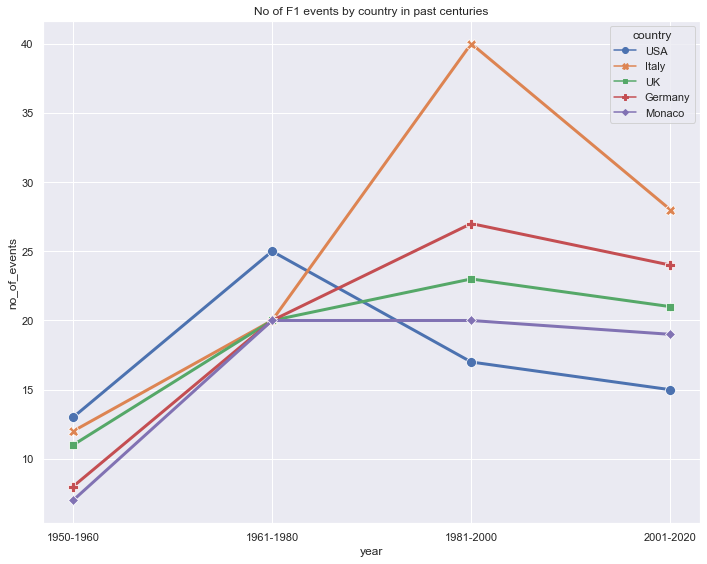

In [35]:
sns.set(rc={'figure.figsize':(10,8)})
g=sns.lineplot(
    data=df_4,
    x="year", y="no_of_events", hue="country", style="country",
    markers=True, dashes=False, linewidth = 3, markersize=10
)
g.set_title("No of F1 events by country in past centuries")
plt.tight_layout()

### ConstructorResult analysis

#### Gross point awarded in championship

In [67]:
df_5 = get_df(f"""
SELECT constructor, sum(points) as total_points FROM f1_db.constructor_point_view group by constructor order by total_points desc;
""")
df_5.head(10)

,constructor,total_points
0,Ferrari,8395.5
1,McLaren,5566.5
2,Mercedes,5522.0
3,Red Bull,4934.5
4,Williams,3534.0
5,Renault,1716.0
6,Force India,1084.0
7,Team Lotus,918.0
8,Benetton,861.5
9,Lotus F1,706.0


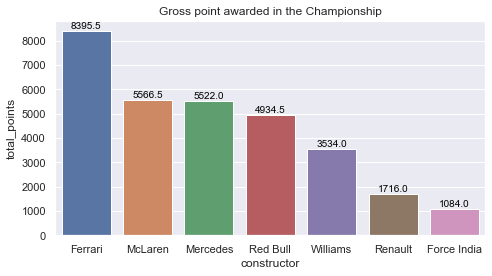

In [68]:
sns.set(rc={'figure.figsize':(7,4)})
g=sns.barplot(x='constructor',y='total_points',data=df_5.head(7))
g.set_title("Gross point awarded in the Championship")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_5['total_points'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

#### no of events by grand prix

In [69]:
df_6 = get_df(f"""
SELECT name as grand_prix,count(*) as no_of_events FROM f1_db.races group by name order by no_of_events desc;
""")
df_6.head(10)

,grand_prix,no_of_events
0,Italian Grand Prix,71
1,British Grand Prix,71
2,Monaco Grand Prix,66
3,Belgian Grand Prix,65
4,German Grand Prix,64
5,French Grand Prix,60
6,Spanish Grand Prix,50
7,Canadian Grand Prix,50
8,Brazilian Grand Prix,47
9,United States Grand Prix,41


#### Gross point pivot table

In [153]:
df_7 = get_df(f"""
SELECT grand_prix, constructor, sum(points) as total_points FROM f1_db.constructor_point_view group by grand_prix,constructor order by grand_prix,constructor
""")

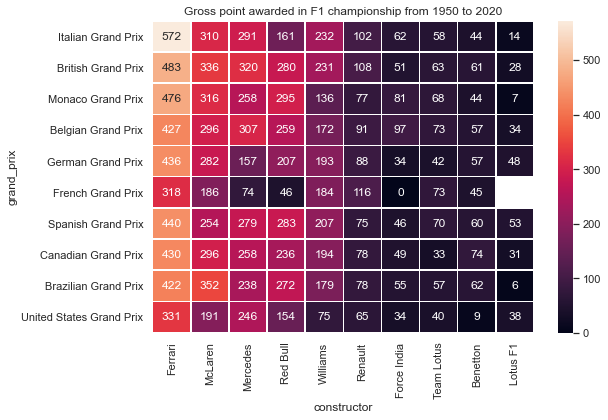

In [176]:
df_8 = df_7.copy()
df_8 = df_8[df_8["grand_prix"].isin(df_6.head(10)["grand_prix"])]
df_8 = df_8[df_8["constructor"].isin(df_5.head(10)["constructor"])]

df_9 = df_8.pivot("grand_prix","constructor","total_points")
df_9 = df_9.reindex(df_6.head(10)["grand_prix"])
df_9 = df_9.reindex(df_5.head(10)["constructor"],axis="columns")

f, ax = plt.subplots(figsize=(9, 6))
g= sns.heatmap(df_9, annot=True,fmt=".0f", linewidths=.5, ax=ax)
g.set_title("Gross point awarded in F1 championship from 1950 to 2020")
plt.tight_layout()

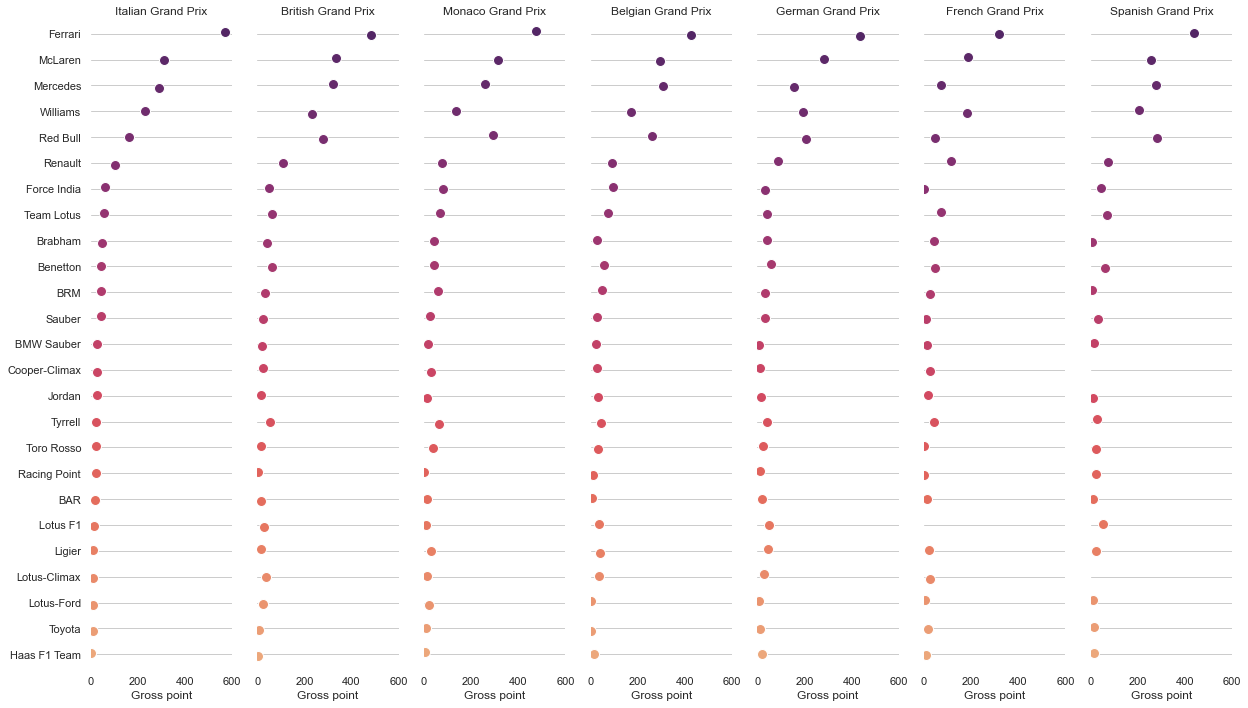

In [251]:
sns.set_theme(style="whitegrid")
df_9 = df_7.copy()
df_9 = df_9[df_9["grand_prix"].isin(df_6.head(7)["grand_prix"])]
df_9 = df_9[df_9["constructor"].isin(df_5.head(25)["constructor"])]
df_9 = df_9.pivot("constructor","grand_prix","total_points")
df_9 = df_9.reindex(df_6.head(7)["grand_prix"],axis="columns")
df_9 = df_9.reindex(df_5.head(25)["constructor"])
df_9 = df_9.reset_index()
g = sns.PairGrid(df_9.sort_values("Italian Grand Prix", ascending=False), x_vars=df_9.columns[1:], y_vars=["constructor"],
                 height=10, aspect=0.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 600), xlabel="Gross point", ylabel="")

# # Use semantically meaningful titles for the columns
titles = df_9.columns[1:]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

### Constructor analysis

#### Top nationality constructor 

In [180]:
get_df(f"""
SELECT nationality,count(*) as no_of_constructors FROM f1_db.constructors group by nationality order by no_of_constructors desc;
""").head(10)

,nationality,no_of_constructors
0,British,86
1,American,39
2,Italian,31
3,French,12
4,German,10
5,Japanese,5
6,Swiss,4
7,Dutch,3
8,South African,3
9,Russian,2


### ConstructorStanding analysis

In [217]:
df_10 = get_df(f"""
SELECT * FROM f1_db.constructor_standing_view;
""")
curr_constructor = None
curr_year = None
prev_wins = 0
prev_points = 0
for i,v in df_10.iterrows():
    if curr_constructor != v.constructor:
        curr_constructor = v.constructor
        prev_wins = 0
        prev_points = 0
        curr_year = v.year
    if curr_year != v.year:
        prev_wins = 0
        prev_points = 0
        curr_year = v.year
    if v.wins > prev_wins:
        df_10.loc[i, "is_win"] = 1
    else:
        df_10.loc[i, "is_win"] = 0
    df_10.loc[i,"race_point"] = v.points - prev_points
    prev_wins = v.wins
    prev_points = v.points
df_10.head()

,constructor,nationality,year,round,grand_prix,date,location,circuit_country,points,position,positionText,wins,is_win,race_point
0,AGS,French,1986,13,Italian Grand Prix,1986-09-07,Monza,Italy,0.0,14,14,0,0.0,0.0
1,AGS,French,1986,14,Portuguese Grand Prix,1986-09-21,Estoril,Portugal,0.0,14,14,0,0.0,0.0
2,AGS,French,1986,15,Mexican Grand Prix,1986-10-12,Mexico City,Mexico,0.0,14,14,0,0.0,0.0
3,AGS,French,1986,16,Australian Grand Prix,1986-10-26,Adelaide,Australia,0.0,14,14,0,0.0,0.0
4,AGS,French,1987,1,Brazilian Grand Prix,1987-04-12,Rio de Janeiro,Brazil,0.0,8,8,0,0.0,0.0


In [ ]:
# pd.set_option('display.max_rows', 50)

In [246]:
df_11 = df_10.copy()
df_11 = df_11.groupby(["grand_prix","constructor"]).agg({"is_win":["sum"],"race_point":["sum"]})
df_11 = df_11.reset_index()
df_11.columns = df_11.columns.droplevel(1)
df_11 = df_11.rename({"is_win":"total_wins","race_point":"total_points"},axis="columns")
df_11

,grand_prix,constructor,total_wins,total_points
0,70th Anniversary Grand Prix,Alfa Romeo,0.0,0.0
1,70th Anniversary Grand Prix,AlphaTauri,0.0,1.0
2,70th Anniversary Grand Prix,Ferrari,0.0,12.0
3,70th Anniversary Grand Prix,Haas F1 Team,0.0,0.0
4,70th Anniversary Grand Prix,McLaren,0.0,2.0
...,...,...,...,...
2408,United States Grand Prix West,Theodore,0.0,2.0
2409,United States Grand Prix West,Toleman,0.0,0.0
2410,United States Grand Prix West,Tyrrell,0.0,17.0
2411,United States Grand Prix West,Williams,1.0,28.0


#### Gross victories in championshimp by grand prix

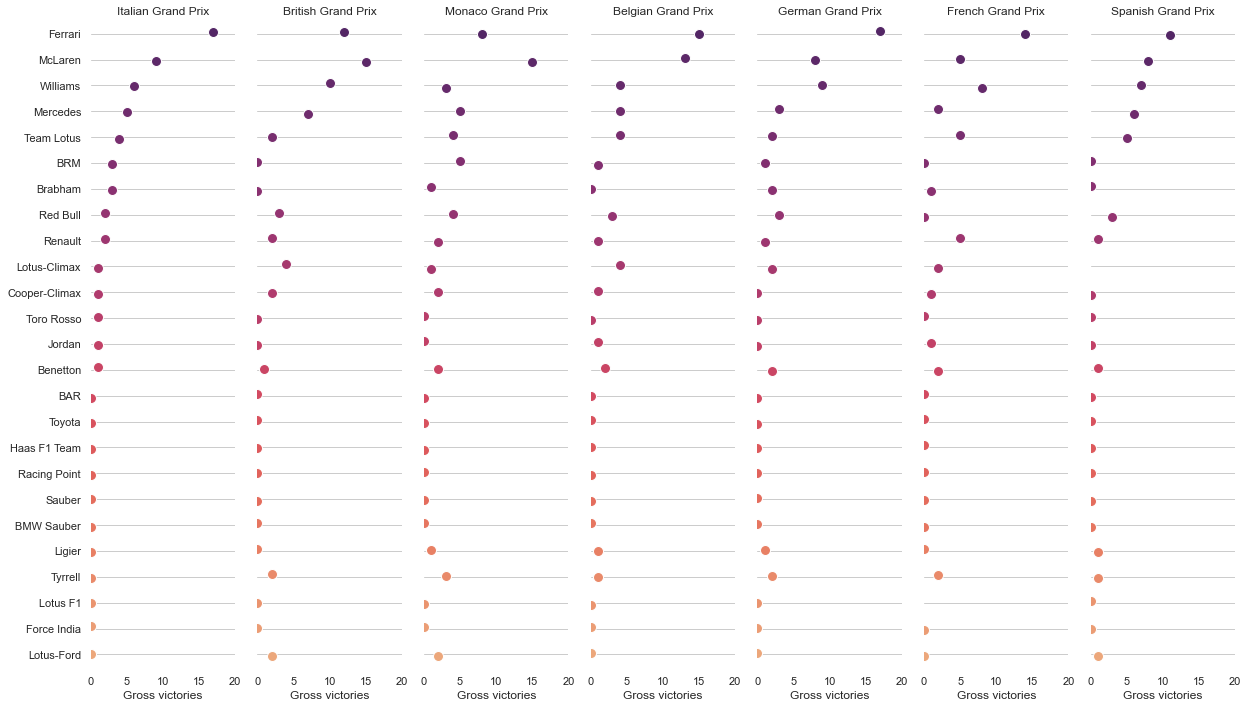

In [255]:
sns.set_theme(style="whitegrid")
df_12 = df_11.copy()
df_12 = df_12[df_12["grand_prix"].isin(df_6.head(7)["grand_prix"])]
df_12 = df_12[df_12["constructor"].isin(df_5.head(25)["constructor"])]
df_12 = df_12.pivot("constructor","grand_prix","total_wins")
df_12 = df_12.reindex(df_6.head(7)["grand_prix"],axis="columns")
df_12 = df_12.reindex(df_5.head(25)["constructor"])
df_12 = df_12.reset_index()
g = sns.PairGrid(df_12.sort_values("Italian Grand Prix", ascending=False), x_vars=df_12.columns[1:], y_vars=["constructor"],
                 height=10, aspect=0.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 20), xlabel="Gross victories", ylabel="")

# # Use semantically meaningful titles for the columns
titles = df_12.columns[1:]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

In [474]:
def plot_team_performance(constructor, year_start, year_end, year_highlight = None):
    df_13 = df_10[df_10["constructor"] == constructor].copy()
    df_13 = df_13[(df_13["year"] >= year_start) & (df_13["year"] <= year_end)]

    f, ax = plt.subplots(figsize=(9, 6))
    ax.set_xticks(range(1,22))
    if year_highlight is not None:
        sns.lineplot(data=df_13,x="round",y="position", color="#6E5C81", linewidth=2.5,markers=True, markersize=9, alpha=0.9)
        sns.lineplot(data=df_13[df_13["year"]==year_highlight],x="round",y="position", color="#4E2A81",linewidth=2.5, marker="o", markersize=9)
        ax.set_title(f"{constructor} team position past performance during {year_start} to {year_end} compare to {year_highlight}")
#     ax.legend(bbox_to_anchor=(0.99, 1.0))
    else:
        sns.lineplot(data=df_13,x="round",y="position",hue="year",style="year",palette="tab10", linewidth=2.5,markers=True, markersize=9)
        ax.set_title(f"{constructor} team position past performance during {year_start} to {year_end}")
    plt.tight_layout()
    
    ## calculate first round and final round position mean
    df_14 = df_13.pivot("year","round","position").copy()
    first_round_mean = round(df_14.iloc[:,0].mean(),1)
    final_round_mean = round(df_14.iloc[:,-1].mean(),1)
    print(f"first round position avg = {first_round_mean}, final round position avg = {final_round_mean}")

first round position avg = 1.8, final round position avg = 2.3


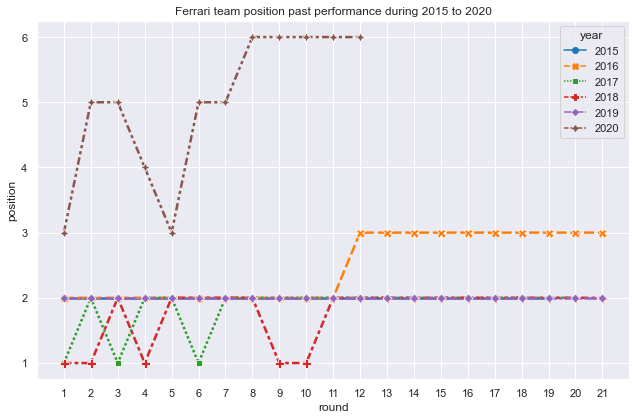

In [475]:
plot_team_performance("Ferrari",2015,2020, None)

first round position avg = 3.5, final round position avg = 2.3


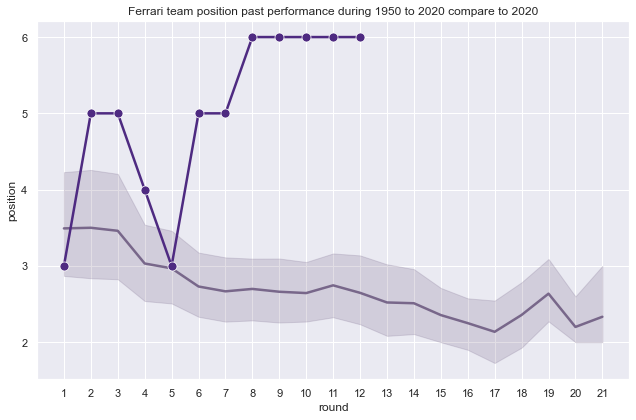

In [476]:
plot_team_performance("Ferrari",1950,2020, 2020)

first round position avg = 4.0, final round position avg = 5.3


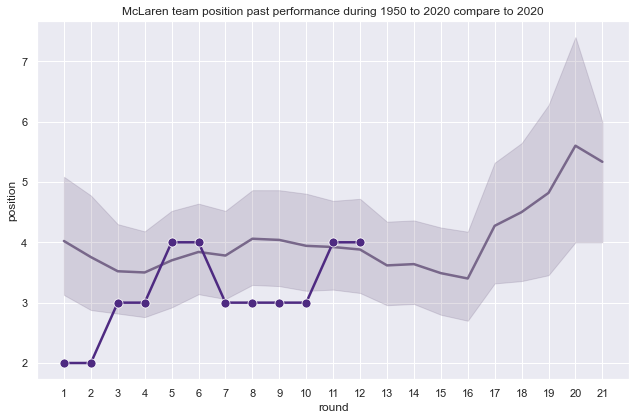

In [477]:
plot_team_performance("McLaren",1950,2020,2020)

first round position avg = 3.2, final round position avg = 1.0


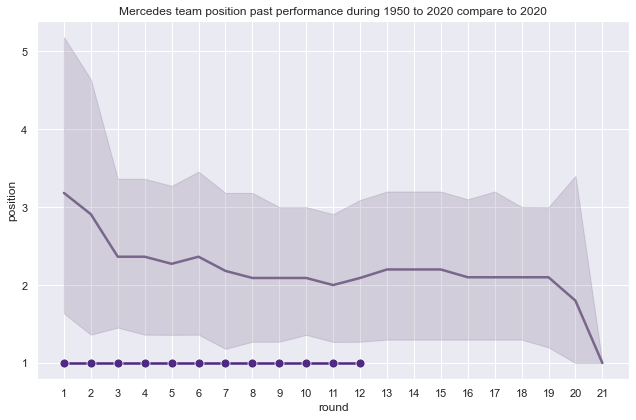

In [478]:
plot_team_performance("Mercedes",1950,2020,2020)

first round position avg = 4.9, final round position avg = 2.7


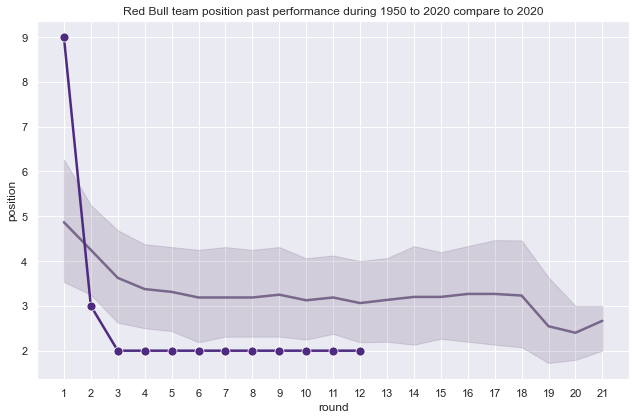

In [479]:
plot_team_performance("Red Bull",1950,2020,2020)

first round position avg = 5.0, final round position avg = 8.3


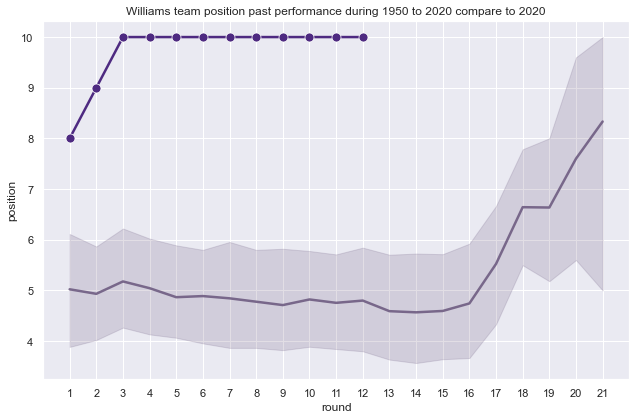

In [481]:
plot_team_performance("Williams",1950,2020,2020)